In [2]:
from basic import SharedMLP

import torch


In [2]:

model = SharedMLP(3)

random_input = torch.randn(3, 10)

output = model(random_input)
output.shape

torch.Size([10, 32])

In [14]:
from torch.nn import AvgPool1d

random_input = torch.randn(1000, 1024)
pool = AvgPool1d(1000)
output = pool(random_input.T).squeeze()
output.shape

torch.Size([1024])

In [3]:
random_input = torch.randn(1000)
random_input.unsqueeze(0).shape

torch.Size([1, 1000])

In [20]:
from basic import TNet, SharedMLP
import torch
import torch.nn as nn  


In [64]:
tnet = TNet(2)
points = torch.randn(500, 2)
points_y = torch.sin(torch.sum(points, dim=1))

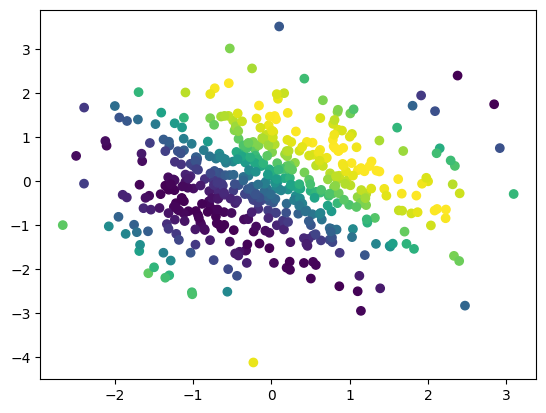

In [65]:
import matplotlib.pyplot as plt
plt.scatter(points[:, 0], points[:, 1], c=points_y)

In [73]:
optimizer = torch.optim.Adam(tnet.parameters(), lr=0.001)
critertion = nn.MSELoss(reduction='none')

for e in range(10*2):
    optimizer.zero_grad()  
    out = tnet(points.T)
    out = torch.sum(points @ out, dim=1)
    print(out.shape)
    loss_per_var = critertion(out, points_y).mean(dim = 0)
    print(loss_per_var)
    loss_per_var.backward()
    optimizer.step()


torch.Size([500])
tensor(0.2563, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.5524, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2625, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.3414, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.3682, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.3069, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2604, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2587, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2772, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2841, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2726, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2581, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2560, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2660, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2700, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2634, grad_fn=<MeanBackward1>)
torch.Size([500])
tensor(0.2559, grad_fn=<MeanBackward1>)
torch.Size([50

In [74]:

m = tnet(points.T).detach().numpy()
points_out = points.detach().numpy() @ m
points_out.shape, points_y.shape

((500, 2), torch.Size([500]))

In [75]:
m

array([[ 0.70747626, -0.29252386],
       [-0.31423652,  0.6857635 ]], dtype=float32)

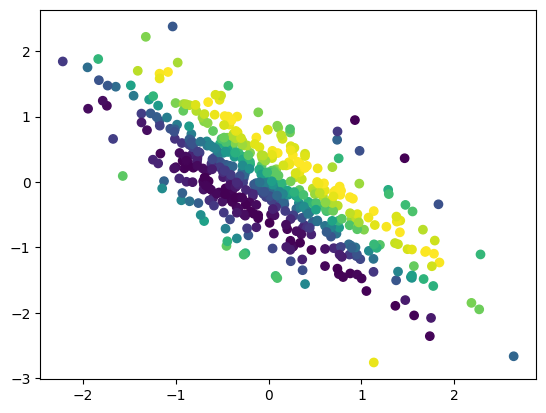

In [76]:
plt.scatter(points_out[:, 0], points_out[:, 1], c=points_y)
